In [ ]:
!pip install -r requirements.txt

^C


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylint 2.7.1 requires mccabe<0.7,>=0.6, but you have mccabe 0.7.0 which is incompatible.


     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.2 MB 186.2 kB/s eta 0:00:39
     ---------------------------------------- 0.0/7.2 MB 178.6 kB/s eta 0:00:41
      --------------------------------------- 0.1/7.2 MB 374.1 kB/s eta 0:00:20
      --------------------------------------- 0.1/7.2 MB 472.1 kB/s eta 0:00:15
     - -------------------------------------- 0.3/7.2 MB 936.6 kB/s eta 0:00:08
     --- ------------------------------------ 0.7/7.2 MB 1.9 MB/s eta 0:00:04
     ------ --------------------------------- 1.2/7.2 MB 2.8 MB/s eta 0:00:03
     ------- -------------------------------- 1.4/7.2 MB 2.9 MB/s eta 0:00:03
     ---------- ----------------------------- 1.9/7.2 MB 3.6 MB/s eta 0:00:02
     ------------- -------------------------- 2.5/7.2 MB 4.4 MB/s eta 0:00:

In [ ]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

#### Chapter 1

While all types of generative models ultimately aim to solve
the same task, they all take slightly different approaches to
modeling the density function pθ (x). Broadly speaking,
there are three possible approaches:
1. Explicitly model the density function, but constrain the
model in some way, so that the density function is
tractable (i.e., it can be calculated).
2. Explicitly model a tractable approximation of the
density function.
3. Implicitly model the density function, through a
stochastic process that directly generates data.

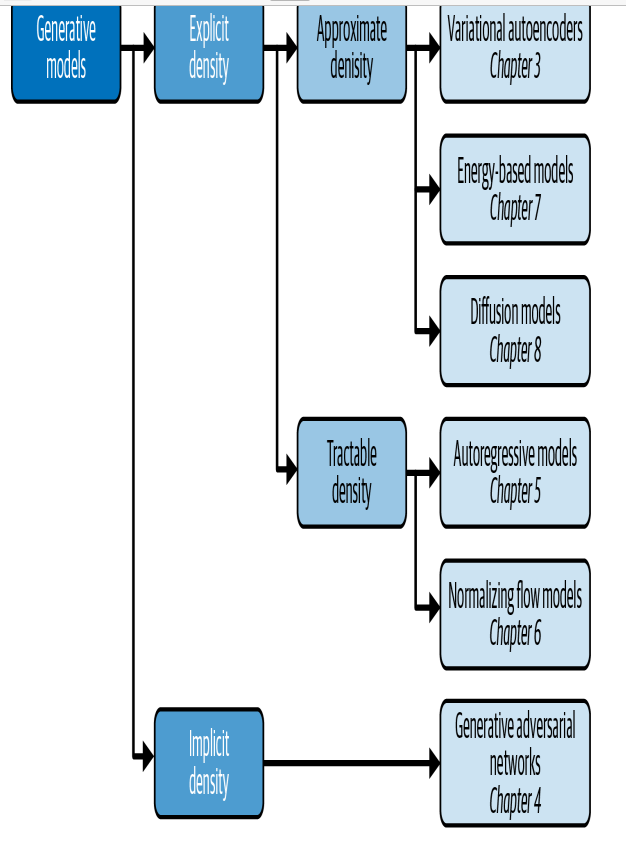

The first split that we can make is between models where
the probability density function p(x) is modeled explicitly
and those where it is modeled implicitly.
- Implicit density models do not aim to estimate the
probability density at all, but instead focus solely on
producing a stochastic process that directly generates data.
The best-known example of an implicit generative model is
a generative adversarial network. We can further split
explicit density models into those that directly optimize the
density function (tractable models) and those that only
optimize an approximation of it.
- Tractable models place constraints on the model
architecture, so that the density function has a form that
makes it easy to calculate. For example, autoregressive
models impose an ordering on the input features, so that
the output can be generated sequentially—e.g., word by
word, or pixel by pixel. Normalizing flow models apply a
series of tractable, invertible functions to a simple
distribution, in order to generate more complex
distributions.
- Approximate density models include variational
autoencoders, which introduce a latent variable and
optimize an approximation of the joint density function.
Energy-based models also utilize approximate methods, but
do so via Markov chain sampling, rather than variational
methods. Diffusion models approximate the density
function by training a model to gradually denoise a given
image that has been previously corrupted.


In [ ]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

#### First ML Model

In [ ]:
import numpy as np
from tensorflow.keras import datasets, utils

(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

In [ ]:
y_train = utils.to_categorical(y_train,NUM_CLASSES)
y_test = utils.to_categorical(y_test,NUM_CLASSES)

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(200,activation='relu'),
    layers.Dense(150,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

ReLU units can
sometimes die if they always output 0, because of a large
bias toward negative values pre-activation. In this case, the
gradient is 0 and therefore no error is propagated back
through this unit. LeakyReLU activations fix this issue by
always ensuring the gradient is nonzero. ReLU-based
functions are among the most reliable activations to use
between the layers of a deep network to encourage stable
training.

The sigmoid activation is useful if you wish the output from
the layer to be scaled between 0 and 1—for example, for
binary classification problems with one output unit or
multilabel classification problems

In [ ]:
model.summary()

If your neural network is designed to solve a regression
problem (i.e., the output is continuous), then you might use
the mean squared error loss.

If you are working on a classification problem where each
observation only belongs to one class, then categorical
cross-entropy is the correct loss function

Finally, if you are working on a binary classification
problem with one output unit, or a multilabel problem
where each observation can belong to multiple classes
simultaneously, you should use binary cross-entropy:



In [ ]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train
    ,y_train
    ,batch_size=32
    ,epochs=10
    ,shuffle=True
)

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single= CLASSES[np.argmax(y_test,axis=-1)]


#### Displaying outputs

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

n_to_show=10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,idx in enumerate(indices):
    img= x_test[idx]
    ax = fig.add_subplot(1,n_to_show,i+1)
    ax.axis('off')
    ax.text(0.5,-0.35,'pred = '+ str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.text(0.5,-0.7,'act = '+ str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.imshow(img)


#### ConvolutionalLayers

Setting padding = "same" is a good way to ensure that you
are able to easily keep track of the size of the tensor as it
passes through many convolutional layers. The shape of the
output from a convolutional layer with padding = "same"

**(input height/stride,input width/stride, filters)**

In [ ]:
from tensorflow.keras import layers
input_layer = layers.Input(shape=(32,32,3))
conv_layer_1 = layers.Conv2D(
    filters=10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
) (input_layer)
conv_layer_2 = layers.Conv2D(
    filters=20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
)(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10, activation='softmax')(flatten_layer)
model = models.Model(input_layer,output_layer)
model.summary()

#### BAtch Normalization
One common problem when training a deep neural network
is ensuring that the weights of the network remain within a
reasonable range of values—if they start to become too
large, this is a sign that your network is suffering from
what is known as the exploding gradient problem. As errors
are propagated backward through the network, the
calculation of the gradient in the earlier layers can
sometimes grow exponentially large, causing wild
fluctuations in the weight values.

This doesn’t necessarily happen immediately as you start
training the network. Sometimes it can be happily training
for hours when suddenly the loss function returns NaN and
your network has exploded

Batch normalization is a technique that drastically reduces
this problem. The solution is surprisingly simple. 
- During
training, a batch normalization layer calculates the mean
and standard deviation of each of its input channels across
the batch and normalizes by subtracting the mean and
dividing by the standard deviation. 
- There are then two
learned parameters for each channel, the scale (gamma)
and shift (beta). 
- The output is simply the normalized input,
scaled by gamma and shifted by beta. 

When it comes to prediction, we may only want to
predict a single observation, so there is no batch over
which to calculate the mean and standard deviation. To get
around this problem, during training a batch normalization
layer also calculates the moving average of the mean and
standard deviation of each channel and stores this value as
part of the layer to use at test time.

How many parameters are contained within a batch
normalization layer? For every channel in the preceding
layer, two weights need to be learned: the scale (gamma)
and shift (beta). These are the trainable parameters. The
moving average and standard deviation also need to be
calculated for each channel, but since they are derived
from the data passing through the layer rather than trained
through backpropagation, they are called nontrainable
parameters. In total, this gives four parameters for each
channel in the preceding layer, where two are trainable
and two are nontrainable.

In [ ]:
from tensorflow.keras import layers

input_layer = layers.Input(shape=(32,32,3))
#CNN Layer 1
x = layers.Conv2D(
    filters=32
    , kernel_size = 3
    , strides = 1
    , padding = 'same'
) (input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#CNN Layer 2
x = layers.Conv2D(
    filters=32
    , kernel_size = 3
    , strides = 2
    , padding = 'same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#CNN Layer 3
x = layers.Conv2D(
    filters=64
    , kernel_size = 3
    , strides = 1
    , padding = 'same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#CNN Layer 4
x = layers.Conv2D(
    filters=64
    , kernel_size = 3
    , strides = 2
    , padding = 'same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(units=128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

output_layer = layers.Dense(units=10, activation='softmax')(x)
model = models.Model(input_layer,output_layer)
model.summary()

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
import tensorflow

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.legacy.Adam(learning_rate=0.0005),
              metrics=['accuracy'])
model.fit(x_train
    ,y_train
    ,batch_size=32
    ,epochs=10
    ,shuffle=True
)

In [ ]:
preds = model.predict(x_test)
model.evaluate(x_test,y_test)

In [ ]:

preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single= CLASSES[np.argmax(y_test,axis=-1)]

n_to_show=10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,idx in enumerate(indices):
    img= x_test[idx]
    ax = fig.add_subplot(1,n_to_show,i+1)
    ax.axis('off')
    ax.text(0.5,-0.35,'pred = '+ str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.text(0.5,-0.7,'act = '+ str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.imshow(img)
